In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://finance.naver.com/sise/"


In [4]:
req = requests.get(url)
# html 정보에서 text정보만 추출
html = req.text
soup = BeautifulSoup(html, 'html.parser')

# my_stock 변수에 select 할 내용을 찾아서 넣어준다
my_stock = soup.select('.lst_pop')
#my_stock = soup.select('.lst_major')

for stock_name in my_stock:
    print(stock_name.text)



다우산업33,706.74하락
 나스닥12,705.22하락
 홍콩H6,719.88상승
 상해종합3,258.08하락
 니케이22528,930.33하락



In [5]:
import urllib.request

# 웹사이트 정보 요청
page = urllib.request.urlopen(url)

# 해당 페이지는 cp949 방식의 인코딩 사용
html = page.read().decode('cp949')

soup = BeautifulSoup(html, 'html.parser')

soup.select('span.num')


[<span class="num _au_real_list">@code@</span>,
 <span class="num num2" id="KOSPI_now">2,492.69</span>,
 <span class="num num2" id="KOSDAQ_now">814.17</span>,
 <span class="num num2" id="KPI200_now">326.79</span>]

In [9]:
soup.select('span.num')[1]
soup.select('span.num')[1].string
float(soup.select('span.num')[1].string.replace(',', ''))

2492.69

In [10]:
# input으로 id = 'KOSPI_now' 처럼 지정
soup.find(id = 'KOSPI_now')
# string 속성을 가져와 원하는 데이터까지 도달
soup.find(id = 'KOSPI_now').string


'2,492.69'

In [16]:
# 코스피 등락률 크롤링
soup.find(id = 'KOSPI_change')
#soup.find(id = 'KOSPI_change').contents

#soup.find(id = 'KOSPI_change').contents[2]
#soup.find(id = 'KOSPI_change').contents[2].split()

#soup.find(id = 'KOSPI_change').contents[3].string


<span class="num_s num_s2" id="KOSPI_change">
<span class="ndown"></span>15.36 -0.61%<span class="blind">상승</span>
</span>

In [17]:
# 크롤링을 할 때, 해당 사이트에서 컴퓨터로 인식해서 데이터 추출을 방해하는 경우
# User-Agent 설정

def NS_users_crawler(codes, page):
    # User-Agent 설정
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'}
    result_df = pd.DataFrame([])

    n_ = 0
    for page in range(1, page):
        n_ += 1
        if (n_ % 10 == 0):
            print('================== Page ' + str(page) + ' is done ==================')
        url = "https://finance.naver.com/item/board.naver?code=%s&page=%s" % (codes, str(page))
        # html → parsing
        html = requests.get(url, headers=headers).content
        # 한글 깨짐 방지 decode
        soup = BeautifulSoup(html.decode('euc-kr', 'replace'), 'html.parser')
        table = soup.find('table', {'class': 'type2'})
        tb = table.select('tbody > tr')

        for i in range(2, len(tb)):
            if len(tb[i].select('td > span')) > 0:
                date = tb[i].select('td > span')[0].text
                title = tb[i].select('td.title > a')[0]['title']
                views = tb[i].select('td > span')[1].text
                pos = tb[i].select('td > strong')[0].text
                neg = tb[i].select('td > strong')[1].text
                table = pd.DataFrame({'날짜': [date], '제목': [title], '조회': [views], '공감': [pos], '비공감': [neg]})
                result_df = result_df.append(table)

    return result_df

In [19]:
data = NS_users_crawler("323410", 3)
data.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_40456\594316629.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\user\AppData\Local\Temp\ipykernel_40456\594316629.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\user\AppData\Local\Temp\ipykernel_40456\594316629.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\user\AppData\Local\Temp\ipykernel_40456\594316629.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(table)
C:\Users\user\AppData\Local\Temp\ipykernel_40456\594

,날짜,제목,조회,공감,비공감
0,2022.08.21 14:41,망해라 주당2000원짜리,1,0,0
0,2022.08.21 14:36,난 토스쓴다,5,0,0
0,2022.08.21 14:36,어차피 정부차원이나 1금융권은행들 입장에서는,12,0,0
0,2022.08.21 14:32,국민은행이 항복햇다!,16,0,0
0,2022.08.21 14:25,시총 아직높은거알지??,14,1,0
0,2022.08.21 14:24,카뱅임원들 회사차원에 자사주매입,19,0,0
0,2022.08.21 14:16,음 내 예언대로 지하실에 도착했꾼!!,69,0,0
0,2022.08.21 14:15,시총 13조 실화임?,29,0,0
0,2022.08.21 14:12,대표적인 K뱅크의 우수성을....,42,0,0
0,2022.08.21 14:11,9만원대,40,0,0


In [21]:
import pandas as pd
import requests
code = '323410'
URL = f"https://finance.naver.com/item/main.nhn?code={code}"
r = requests.get(URL)
df = pd.read_html(r.text)[3]
df


주요재무정보 최근 연간 실적                            최근 분기 실적                     \
       주요재무정보  2019.12 2020.12 2021.12 2022.12(E)  2021.03  2021.06   2021.09   
       주요재무정보   IFRS별도  IFRS별도  IFRS별도     IFRS별도   IFRS별도   IFRS별도    IFRS별도   
0         매출액     6649    8042   10649        NaN  2249.00  2536.00   2773.00   
1        영업이익      133    1226    2569       3876   540.00   798.00    712.00   
2       당기순이익      137    1136    2041       2846   467.00   693.00    520.00   
3       영업이익률     1.99   15.24   24.13        NaN    24.00    31.46     25.67   
4        순이익률     2.07   14.13   19.17        NaN    20.74    27.32     18.75   
5   ROE(지배주주)     0.97    5.08    4.91       5.05      NaN      NaN       NaN   
6        부채비율  1253.66  852.82  552.74        NaN   904.27   928.23    548.19   
7        당좌비율      NaN     NaN     NaN        NaN      NaN      NaN       NaN   
8         유보율    -8.04   37.22  132.40        NaN    39.12    41.98    130.61   
9      EPS(원)       51     309     467        598   114.00   169.00    114.00   
10     PER(배)      NaN     NaN  126.36      47.93      NaN      NaN       NaN   
11     BPS(원)     4598    6861   11620      12083  6956.00  7099.00  11531.00   
12     PBR(배)        -       -    5.08       2.37      NaN      NaN      5.93   
13   주당배당금(원)      NaN     NaN     NaN          -      NaN      NaN       NaN   
14   시가배당률(%)      NaN     NaN     NaN        NaN      NaN      NaN       NaN   
15    배당성향(%)        -       -       -        NaN      NaN      NaN       NaN   

                                   
     2021.12   2022.03 2022.06(E)  
      IFRS별도    IFRS별도     IFRS별도  
0    3091.00   3384.00        NaN  
1     520.00    884.00     1080.0  
2     362.00    668.00      741.0  
3      16.81     26.12        NaN  
4      11.70     19.74        NaN  
5       4.91      5.34        NaN  
6     552.74    606.07        NaN  
7        NaN       NaN        NaN  
8     132.40    133.21        NaN  
9      76.00    141.00      156.0  
10    126.36    104.41      198.7  
11  11620.00  11660.00        NaN  
12      5.08      4.43        NaN  
13       NaN       NaN        NaN  
14       NaN       NaN        NaN  
15       NaN       NaN        NaN

In [24]:
import pandas as pd
import requests
code = '005930'
URL = f"https://finance.naver.com/item/main.nhn?code={code}"
r = requests.get(URL)
df = pd.read_html(r.text)[3]
df.set_index(df.columns[0],inplace=True)
df.index.rename('주요재무정보', inplace=True)
df.columns = df.columns.droplevel(2)

annual_date= pd.DataFrame(df).xs('최근 연간 실적',axis=1)
quater_date = pd.DataFrame(df).xs('최근 분기 실적',axis=1)

#annual_date
#quater_date

In [25]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://finance.naver.com/sise/sise_market_sum.naver')
soup = BeautifulSoup(res.content.decode('euc-kr', 'replace'),'html.parser')

# 어느 박스에 감싸져있는지 확인
section = soup.find('tbody')
items= section.find_all('tr', onmouseover="mouseOver(this)")
for item in items :
    basic_info = item.get_text()
    print(basic_info)



1
삼성전자
60,900


				600
				



				-0.98%
				

100
3,635,598
5,969,783
49.81
6,882,431
9.24
13.92



2
LG에너지솔루션
447,000


				5,000
				



				-1.11%
				

500
1,045,980
234,000
4.07
223,306
742.52
10.68



3
SK하이닉스
96,400


				700
				



				+0.73%
				

5,000
701,794
728,002
49.95
1,880,608
6.11
16.84



4
삼성바이오로직스
868,000


				7,000
				



				-0.80%
				

2,500
617,790
71,174
10.77
29,419
115.44
8.21



5
삼성전자우
55,800


				600
				



				-1.06%
				

100
459,171
822,887
71.92
463,075
8.46
N/A



6
LG화학
640,000


				11,000
				



				-1.69%
				

5,000
451,791
70,592
47.82
124,628
22.56
18.47



7
삼성SDI
618,000


				6,000
				



				-0.96%
				

5,000
424,965
68,765
43.77
124,151
28.83
8.45



8
NAVER
248,000


				2,000
				



				-0.80%
				

100
406,842
164,049
53.25
371,000
40.46
106.72



9
현대차
190,000


				4,000
				



				+2.15%
				

5,000
405,970
213,668
27.98
765,888
8.43
6.84



10
카카오
76,700


				2,500
				



				-3.16%
				

100
341,430
445,150
28.85


In [26]:
def return_value(address):
    res = requests.get(address)
    soup = BeautifulSoup(res.content, 'html.parser')

    section = soup.find('tbody')
    items = section.find_all('tr', onmouseover="mouseOver(this)")
    for item in items:
        basic_info = item.get_text()
        sinfo = basic_info.split("\n")
        print("\t" + sinfo[1] + "\t\t" + sinfo[2] + "\t\t\t" + sinfo[3])


baseaddress = 'https://finance.naver.com/sise/sise_market_sum.naver?&page='
for i in range(1,35):
    return_value(baseaddress+str(i))


	1		삼성전자			60,900
	2		LG에너지솔루션			447,000
	3		SK하이닉스			96,400
	4		삼성바이오로직스			868,000
	5		삼성전자우			55,800
	6		LG화학			640,000
	7		삼성SDI			618,000
	8		NAVER			248,000
	9		현대차			190,000
	10		카카오			76,700
	11		기아			77,200
	12		셀트리온			201,500
	13		삼성물산			120,000
	14		POSCO홀딩스			255,000
	15		KB금융			50,800
	16		현대모비스			214,500
	17		SK이노베이션			204,500
	18		신한지주			35,700
	19		SK			231,500
	20		LG전자			101,000
	21		한국전력			21,500
	22		카카오뱅크			28,650
	23		두산에너빌리티			21,150
	24		LG			83,800
	25		크래프톤			255,000
	26		삼성생명			62,200
	27		현대중공업			138,500
	28		포스코케미칼			157,000
	29		하나금융지주			38,500
	30		HMM			23,250
	31		KT&G			81,600
	32		SK텔레콤			51,000
	33		LG생활건강			714,000
	34		고려아연			587,000
	35		S-Oil			94,000
	36		삼성에스디에스			133,500
	37		삼성전기			136,500
	38		KT			38,650
	39		대한항공			26,200
	40		삼성화재			201,000
	41		카카오페이			68,800
	42		우리금융지주			12,450
	43		SK바이오사이언스			116,500
	44		한화솔루션			46,600
	45		엔씨소프트			374,500
	46		LG이노텍			338,500
	47		하이브			186,500
	48		아모레퍼시픽			127,000
	49		기업은행			9,770
	50		현대글로비스			1

	351		НХМКРЬПЃСі			2,300
	352		DLАЧМГ			21,300
	353		ФкПРЗеБлЗЮЙњ			18,550
	354		КљБзЗЙ			47,300
	355		ОЦММОЦНУИрЦЎ			11,950
	356		БЙЕЕШ­Ча			51,600
	357		РЬПЌСІОр			25,700
	358		ЛяШ­ФмЕЇМ­			44,350
	359		МлПјЛъОї			19,150
	360		ЧбБЙРкЛъНХХЙ			3,705
	361		TIGER KRX2ТїРќСіK-ДКЕє			14,830
	362		ММСјСпАјОї			7,900
	363		KODEX Top5PlusTR			15,620
	364		KODEX ФкНКДк150МБЙАРЮЙіНК			4,800
	365		ФкИЎОЦНсХАЦЎ			18,800
	366		ЛяОчЛч			43,050
	367		KINDEX ЙЬБЙГЊНКДк100			13,700
	368		ЕПРЯЛъОї			180,500
	369		ШяОЦЧиПю			1,820
	370		ЧбРЯЧіДыНУИрЦЎ			24,550
	371		НКФЋРЬЖѓРЬЧС			9,090
	372		РЯОчОрЧА			22,750
	373		РЬМіЦфХИНУНК			6,850
	374		НХМКХыЛѓ			3,010
	375		ЧбБЙХфСіНХХЙ			1,705
	376		KODEX ЙЬБЙFANGЧУЗЏНК(H)			22,105
	377		HSDПЃСј			9,110
	378		SIMPAC			6,460
	379		KEC			2,920
	380		ЗдЕЅСЄКИХыНХ			27,400
	381		ИЪНКИЎОѓЦМ1			4,540
	382		HDC			7,030
	383		ФкПРЗеЧУЖѓНКЦН			11,050
	384		KOSEF БЙАэУЄ10Гт			111,470
	385		ЖєОиЖє			8,090
	386		LXЧЯПьНУНК			46,450
	387		KBSTAR KISСОЧеУЄБЧ(A-РЬЛѓ)ОзЦМКъ			

	701		TIGER ФкНКДк150			11,835
	702		ДыНХСѕБЧ2ПьB			14,150
	703		KODEX РхБтСОЧеУЄБЧ(AA-РЬЛѓ)ОзЦМКъKAP			87,535
	704		KODEX ТїРЬГЊЧзМФХзХЉ			6,140
	705		ПЁРЬЧУЗЏНКПЁМТ			6,190
	706		БњВ§ЧбГЊЖѓ			3,740
	707		РЏДЯПТИгЦМИЎОѓ			3,315
	708		STXСпАјОї			4,905
	709		ЧбБЙГЛШ­			3,355
	710		ЙЬУЂМЎРЏ			79,000
	711		ЕПОчУЖАќ			1,150
	712		БиЕПРЏШ­			3,910
	713		SHПЁГЪСіШ­Ча			1,225
	714		НХРЯРќРк			1,910
	715		ДыУЂ			1,480
	716		KODEX WTIПјРЏМБЙАРЮЙіНК(H)			4,645
	717		ARIRANG ФкНКЧЧTR			12,885
	718		ШВБнПЁНКЦМ			7,890
	719		TIGER ЧіДыТїБзЗь+ЦнДѕИрХа			22,480
	720		НжЙцПя			505
	721		РЬСіНКЗЙСіДјНКИЎУї			4,670
	722		ИЖНКХЯЧСИЎЙЬОюИЎУї			4,980
	723		TRUE ФкНКЧЧ ОчИХЕЕ 5% OTM ETN			8,745
	724		ММОЦЦЏМіА­			15,300
	725		ЧбОчСѕБЧ			10,300
	726		NIНКЦП			4,560
	727		ДыНХ АёЕх ФПЙіЕхФн ХИАй 5%РЮФФ ETN(H)			13,025
	728		ЛяРЭОЧБт			1,435
	729		И№ГЊИЎРк			3,550
	730		TIGER ЙЬЕ№ОюФСХйУї			7,125
	731		ХТАцКёФЩРЬ			4,685
	732		Е№ПЭРЬЦФПі			11,700
	733		ЧбБЙАјЧз			40,300
	734		KODEX ЙЬБЙИоХИЙіНКГЊНКДкОзЦМКъ			

	1051		ЛяМК ЙЬБЙ ДыЧќ МКРхСж ETN			23,720
	1052		KODEX ТїРЬГЊH			16,300
	1053		ПьНХНУНКХл			2,545
	1054		ЕПОчАэМг			16,050
	1055		РЏПЃСЉ			3,515
	1056		SJMШІЕљНК			3,105
	1057		РЏШ­СѕБЧПь			2,650
	1058		ЙЬЗЁЛъОї			10,400
	1059		ОООЦРЬХзХЉ			1,060
	1060		HANARO Fn K-ДКЕєЕ№СіХаЧУЗЏНК			9,225
	1061		SOL 200 Top10			8,540
	1062		ЙЬЗЁПЁМТ РЮЙіНК 2X ПјРЏМБЙАШЅЧе ETN(H)			18,385
	1063		ГьНЪРкШІЕљНК2Пь			53,700
	1064		МОЦЎЗВРЮЛчРЬЦЎ			2,490
	1065		ШЃХкНХЖѓПь			59,500
	1066		ЛяМК КэЗыЙіБз ЗЙЙіИЎСі WTIПјРЏ МБЙА ETN			17,840
	1067		ДыБГПьB			2,290
	1068		SOL БлЗЮЙњХКМвЙшУтБЧМБЙАIHS(ЧеМК)			13,870
	1069		ЕЮЛъЧЛОѓМП2ПьB			14,850
	1070		KINDEX РЮЕЕГзНУОЦMSCI(ЧеМК)			10,810
	1071		KODEX ОЦНУОЦДоЗЏУЄБЧSRIЧУЗЏНКОзЦМКъ			50,115
	1072		ЕППјБнМг			945
	1073		KBSTAR СпБтПьЗЎШИЛчУЄ			102,035
	1074		РЬШ­ЛъОї			15,700
	1075		АцРЮРќРк			27,900
	1076		KOSEF ЙЬБЙДоЗЏМБЙАЗЙЙіИЎСі			11,960
	1077		KINDEX СОЧеУЄБЧ(AA-РЬЛѓ)KISОзЦМКъ			93,420
	1078		TIGER ЗЙЙіИЎСі			15,405
	1079		ЙЬЗЁОЦРЬОиСі			333
	1080		TIGER ЙЬБЙГЊ

	1301		WOORI ДыЧбЙЮБЙБЙАэУЄОзЦМКъ			50,795
	1302		QV ЙЬБЙ IT TOP5 ETN(H)			27,130
	1303		ИоИЎУї ЙЬБЙЗЙЙіИЎСі РЮЧУЗЙРЬМЧБЙУЄETN(H)			9,395
	1304		KOSEF ЙЬБЙЙцОюЙшДчМКРхГЊНКДк			14,450
	1305		KINDEX ЗЏНУОЦMSCI(ЧеМК)			10,070
	1306		ИоИЎУї КэЗыЙіБз РЮЙіНК 2X WTIМБЙА ETN(H)			18,625
	1307		ФкПРЗеПь			17,250
	1308		SOL РЏЗДХКМвЙшУтБЧМБЙАS&P(H)			15,325
	1309		ЛяОчШІЕљНКПь			60,300
	1310		ARIRANG ФкНКЧЧ50			22,515
	1311		TIGER 200 ПЁГЪСіШ­Ча			16,785
	1312		ИоИЎУї ЗЙЙіИЎСі Бн МБЙА ETN(H)			18,045
	1313		QV ЗЙЙіИЎСі Бн МБЙА ETN(H)			18,040
	1314		НХЧб РЮЙіНК 2X УЕПЌАЁНК МБЙА ETN(H)			90
	1315		ЧбСјФЎПь			33,400
	1316		ЧЯГЊ S&P ЗЙЙіИЎСі WTIПјРЏ МБЙА ETN			17,905
	1317		НХЧб КэЗыЙіБз ЗЙЙіИЎСі WTIПјРЏ МБЙА ETN			17,885
	1318		QV КэЗыЙіБз 2X WTIПјРЏМБЙА ETN			17,825
	1319		ЙЬЗЁПЁМТ Q150 Core5 ETN			8,880
	1320		ЛяМК РЮЙіНК 2X БИИЎ МБЙА ETN(H)			3,545
	1321		KODEX БлЗЮЙњ4ТїЛъОїЗЮКИЦННК(ЧеМК)			16,220
	1322		KINDEX ПјРкЗТХзИЖЕіМ­ФЁ			12,600
	1323		KODEX ФкНКЧЧ100			25,150
	1324		LXШІЕљНК1Пь			12,00

	1551		TRUE FnGuide IoT ETN			9,425
	1552		삼성 인버스 China A50 선물 ETN(H)			9,375
	1553		KBSTAR 중장기국공채액티브			99,540
	1554		TIGER 코스닥150바이오테크			8,430
	1555		KOSEF KRX100			5,140
	1556		KODEX MSCI Korea			15,420
	1557		TRUE 인버스 2X HSCEI ETN(H)			9,245
	1558		KINDEX 싱가포르리츠			13,200
	1559		KODEX 차이나메타버스액티브			10,825
	1560		KODEX 혁신기술테마액티브			11,490
	1561		KODEX TSE일본리츠(H)			13,065
	1562		TIGER S&P글로벌인프라(합성)			13,040
	1563		KBSTAR 중국MSCI China(H)			8,670
	1564		TRUE 구리 선물 ETN			9,080
	1565		ARIRANG KRX300			15,115
	1566		메리츠 미국채10년 ETN(H)			9,050
	1567		메리츠 CSI 300 ETN			9,035
	1568		KB 레버리지 금 선물 ETN(H)			18,055
	1569		KINDEX 멕시코MSCI(합성)			11,275
	1570		메리츠 레버리지 국채10년 ETN			9,005
	1571		TRUE 베트남 VN30 선물 ETN(H)			9,005
	1572		동원시스템즈우			33,900
	1573		KINDEX 중장기국공채액티브			96,070
	1574		KBSTAR 국채선물10년			51,085
	1575		KODEX Fn웹툰&드라마			6,335
	1576		TIGER 미국달러선물레버리지			12,625
	1577		TREX 펀더멘탈 200			35,295
	1578		KBSTAR KRX300레버리지			12,560
	1579		미래에셋 인버스 에너지화학 Core5 ETN			4,390
	1580		HANARO Fn5G산업			11,700

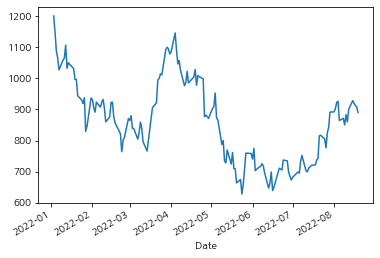

In [39]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')

# 개별 종목 가격 데이터 가져오기
#df = fdr.DataReader('종목코드', '시작일자'. '종료일자')

# 한국주식 (삼성전자)
#df = fdr.DataReader('323410', '2022')
#df
#df['Open'].plot();

# 미국주식 (APPLE) # df['Close'].plot();
df = fdr.DataReader('TSLA', '2022')
#df
df['Close'].plot();

# ETF 데이터 가져오기 # 미국(ETF/US), 일본(ETF/JP)
#df_etf = fdr.StockListing('ETF/KR')
#df_etf

# KODEX 200선물인버스2X 사례
#df_inver = fdr.DataReader('252670')
#df_inver
